# PCA: Principle Component Analysis

## Understanding PCA with an example
### Caveat: The example is a long one but I think you will understand it better if you read it.
Let's say you work as a Data Scientist for an Ad Marketing Agency where your task is to analyze the data about customer purchases and find patterns as to **what made a user buy something and how can I make him/her buy more?**

Now, this question we posed above can have so many follow up questions, like:
1. Where did the user prefer buying from ? (Amazon, Flipkart, etc)
2. What kind of add did the user click most time on? (display ads, search ads, product listing ads, email, etc)
3. Which ad networks/channel showed most conversions? (Facebook, Google, Twitter, LinkedIn)
4. Some complex questions can include, did a user first see an ad on Facebook and then googled up to see the best prices and buy it? <br>
These are just some question out of the thousands that can be answered to improve user experience, customer acquisition, etc

**Let's look what kind of data you may get to analyze.** Let's accept the fact that, storing the information in __RDBMS__ is not a good option because there will be lot of user tracking data that would come in various formats and very difficult to store in RDBMS. <br>
So, this kind of tracking data is usually dumped into a __Data Warehouse__ and then various pipelines are written to extract useful ones into RDBMS to make them faster. I will not go into the details of this, if you are interested, you can read about the same with links in the references section.

So without diverting from a main point, if we have huge number of data, we can just shard them and use them sequentially to keep it very simple, however, if we have more number of fields/columns/features to extract information from, then it would become really time consuming and difficult as well. **Imagine you have data about a user, which shows entire tracking of that particular user for a entire day/month/year, from various places, on various sites, on various products, at various times, from various devices, using various social accounts, etc are stored in a warehouse.**

Simply put, not all of what is stored in the warehouse is useful information and hence we can exclude some of them from our analysis. But, the billion dollar question is, 'HOW'??? How do you actually find out which one is useful and which one is not? <br>
Here, we have __PCA__ smirking at us and lending a helping hand. It says, I can choose the important features for you!

So, you through maybe a __100__ features at it and it will tell you to choose __20__ of them which actually are useful in finding out information about the user.

In the later sections we will see how it actually does this, with a real world example from **MNIST data set** and various steps included in it.

After that, we will look at one more technique like PCA which does this better, called t-SNE

### The Process
- Normalize/Standardize the data, after this step, we get a covariance Vector
- Now find the eigenvectors and eigenvalues of this vector
- The eigen values are scalars that have a certain magnitude
- If eigen values for certain vectors are relatively very low, it is better to discard them off **(these are maybe the features that we were talking about which are not that useful in getting answers about the customer)**. Another way to look at this is, if some of the information is not making much sense, then its better to discard it as to reduce the dimensions and send less features to a machine learning algorithm to predict from.

### Is normalization necessary??
For the customer example, if the price of the commodity ranges from 1 to 1,00,00, and the quantity of items purchased will be let's say 1 to 10. <br>
Does it not make sense to scale them so that they fall in between some rigorous value and doesn't seem like price is almost always overpowering the quantity. <br>

Note that, we do not want to miss out on any useful information.

### Anyways, what is a eigen vector and what does it have to do with PCA??
It's the direction in which the data varies a lot. <br>
Let's say we just defined the first eigen vector having the max eigen value(magnitude). The second eigen vector is the one that has maximum variance again but in the orthogonal direction of the first one; similarly, the third eigen vector is the ones that has max variance but is orthogonal to both first and second and so on if there are more dimensions..

So, this eigen vector is called a Priciple Component.

### Principle Component ??
Remember, we said we want to be able to discard some features, this priciple component will be used to discard these features but without losing max information. This principle compenent covers the max number of dimensions as it can by reorienting the axis.

### How can we reorient the axis, seems so unreal?
Since the principal components or the eigen vectors of the covariance matrix are orthogonal to each other, it is possible that we change the axes of the data i.e reorient the axes.

### Facts about PCA
- Linear Transformation Technique
- PCA depends on closeness of the points, and the closeness in measure as the average squared euclidean distances
- PCA holds the directions that have the maximum spread, or variance
- PCA ignores the class labels
- Higher to lower dimensional without loosing much info
- If there is corelation between data, then it makes sense to reduce the dimensionality

# Code Implementation
Let's play with some code to understand how difficult it is to implement PCA

In [ ]:
import numpy as np
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
%matplotlib inline

### Exploring Data

In [2]:
# read the data
df = pd.read_csv('./datasets/train.csv')

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# remove the label from the training set and add it to another variable
label = df['label']
df.drop('label', axis=1, inplace=True)

In [5]:
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### PCA implementation using sklearn

In [7]:
df.shape

(42000, 784)

The other technique (t-SNE) takes considerable amount of time on the entire dataset and my laptop almost died of one such attack, hence I am reducing(slicing) the data, so that PCA anad t-SNE comparison is easier and on
the same data.

In [23]:
df = df[:2000]
label = label[:2000]

Normalizing/Standardizing data

In [24]:
df_std = StandardScaler().fit_transform(df)

Create a PCA instance with 5 components, i.e. dimensions, taken randomly after some experiments with other values

In [60]:
pca = PCA(n_components=200)

In [50]:
pca = pca.fit(df_std)

In [51]:
variance = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

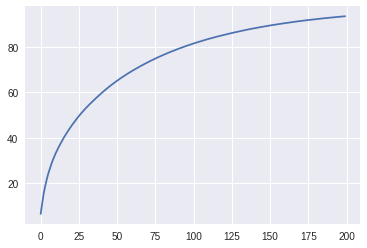

In [52]:
plt.plot(variance)

Looking at the data, we see not much steepness after value 75 on the x-axis, thus I will go with 75 components, to fit and transform the data 

In [57]:
pca = PCA(n_components=75)

In [58]:
df_pca = pca.fit_transform(df_std)

Transform the data depending on the principle components that were obtained from above step. <br>
This is very very easy, all the part of : **covariance matrix, eigen vector calculation, eigen value calculation, choosing the top 5 ones, is done by the above line**

The above line will transform the data according to the new principle components, but we really want to see how it has done it, don't we??

Below I have used a interactive plotting library 'plotly', the code is literally copy pasted from one of the kaggler's code and is very simple to comprehend.

In [59]:
trace0 = go.Scatter(
    x = df_pca[:,0],
    y = df_pca[:,1],
    name = label,
    hoveron = label,
    mode = 'markers',
    text = label,
    showlegend = False,
    marker = dict(
        size = 8,
        color = label,
        colorscale ='Jet',
        showscale = False,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        ),
        opacity = 0.8
    )
)
data = [trace0]

layout = go.Layout(
    title= 'Principal Component Analysis (PCA)',
    hovermode= 'closest',
    xaxis= dict(
         title= 'First Principal Component',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Second Principal Component',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= True
)


fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-scatter')

The above plot however does not show anthing significant and all the efforts put by us might feel wasted, but we actually learned where not to use PCA.
A wise person once said, "It's important what not to do, rather than doing what all to do!"

Now, in seeing what we can do, lets see another technique which can help us solve the issue.

# t-SNE (t- Stochastic Neighbor Embedding)

We, saw in the above plot that, the various dimensions are not well separated and its quite difficult to make out which cluster is which one due to the overlapping of data. However, we would still like to see our points and after all that talk, PCA did not help us see the pattern. Let's see some differences between PCA and t-SNE.

In [20]:
tsne = TSNE(n_iter=1500)

tsne_results = tsne.fit_transform(df_std)

traceTSNE = go.Scatter(
    x = tsne_results[:,0],
    y = tsne_results[:,1],
    name = label,
    hoveron = label,
    mode = 'markers',
    text = label,
    showlegend = True,
    marker = dict(
        size = 8,
        color = label,
        colorscale ='Jet',
        showscale = False,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        ),
        opacity = 0.8
    )
)
data = [traceTSNE]

layout = dict(title = 'TSNE (T-Distributed Stochastic Neighbour Embedding)',
              hovermode= 'closest',
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False),
              showlegend= False,
             )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-scatter')

# References
PCA  <br>
http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html <br>
http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html <br>
https://www.analyticsvidhya.com/blog/2016/03/practical-guide-principal-component-analysis-python/ <br>
http://www.math.union.edu/~jaureguj/PCA.pdf

t-SNE <br>
https://distill.pub/2016/misread-tsne/ <br>
https://www.analyticsvidhya.com/blog/2017/01/t-sne-implementation-r-python/ <br>
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html <br>

Data warehousing and DBMS <br>
https://code.facebook.com/posts/229861827208629/scaling-the-facebook-data-warehouse-to-300-pb/ <br>
http://highscalability.com/blog/2013/4/15/scaling-pinterest-from-0-to-10s-of-billions-of-page-views-a.html <br>
https://medium.com/@Pinterest_Engineering/sharding-pinterest-how-we-scaled-our-mysql-fleet-3f341e96ca6f <br>

Digital Marketing terms <br>
http://www.business2community.com/digital-marketing/20-must-know-digital-marketing-definitions-0797241#lva7eV0FqIrBA2a9.97 <br>

# Note
The tracking data is certainly very huge but the features are not too many, and may not require reduction using PCA but, to make the plot more interesting, I had to choose this example. :) <br>
One more key point is that, PCA and t-SNE work on numerical data, another reason the example is not a really great fit. 